# 빅데이터 분석 프로젝트
## 소프트웨어학부 손시연 20201856

In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import requests
import json
import warnings

In [72]:
# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False

# # 한글 폰트 설정
fe = fm.FontEntry(
    fname=r'./font/NanumGothic.ttf',
    name='NanumGothic')
fm.fontManager.ttflist.insert(0, fe)
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'})

## 미세먼지 데이터
- datasource: [KOSIS 미세먼지(PM2.5) 월별 대기오염도(측정망별,시도별,도시별,측정지점별)](https://kosis.kr/statHtml/statHtml.do?orgId=106&tblId=DT_106N_03_0200076&vw_cd=MT_ZTITLE&list_id=T_7&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE)

### 1. dataset 호출

In [108]:
start_year = 2015
end_year = 2021 # 2022년까지 존재하지만 12월 데이터 부재로 인한 제외
df_dic = {} # keys : 각 연도,  values : 각 연도에 해당하는 csv파일의 DataFrame

# 2015년부터 2021년까지의 csv파일 불러오기
for year in range(start_year, end_year + 1):
    df = pd.read_csv(f'./dataset/미세먼지(PM2.5) 월별 대기오염도/{year}.csv', encoding='cp949')
    df_dic[f'{year}년'] = df

In [74]:
df_dic['2015년']

,구분(1),구분(2),구분(3),구분(4),2015.01,2015.02,2015.03,2015.04,2015.05,2015.06,2015.07,2015.08,2015.09,2015.10,2015.11,2015.12
0,도시대기,서울,중구,서소문동,21,27,34,26,26,24,18,21,14,23,18,23
1,도시대기,서울,종로구,효제동,24,30,27,20,24,28,27,27,17,24,21,32
2,도시대기,서울,중랑구,면목동,26,31,31,22,23,20,19,21,15,22,19,26
3,도시대기,서울,동대문구,용두동,22,26,31,23,22,20,20,23,16,25,22,26
4,도시대기,서울,은평구,불광동,28,33,32,21,20,17,17,21,15,22,19,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,도로변대기,부산,부산,시도평균,32,36,32,30,38,29,23,27,15,24,22,27
133,도로변대기,대구,대구,평리동,49,47,44,34,37,34,24,26,21,36,31,47
134,도로변대기,광주,광주,치평동,36,37,44,29,26,31,24,23,19,34,31,34
135,도로변대기,경기,용인,중부대로(구갈동),-,-,-,-,-,-,-,-,-,-,28,32


### 2. dataset 가공

In [109]:
# 함수 정의
def changeColumns(df): # 데이터 프레임의 컬럼명을 변경하는 함수
    df.columns = ['구분1', '구분2', '구분3', '구분4', '1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월']
    return df

# 데이터 프레임의 컬럼명 변경
for df in df_dic.values():  # key값이 아닌 value로 DataFrame을 바로 추출함
    changeColumns(df)  # 컬럼명 변경 함수 호출

# 데이터 프레임 컬럼명 변경 확인
for year in df_dic.keys():
    print(f'{year} 컬럼명')
    print(df_dic[year].columns, '\n')

2015년 컬럼명
Index(['구분1', '구분2', '구분3', '구분4', '1월', '2월', '3월', '4월', '5월', '6월', '7월',
       '8월', '9월', '10월', '11월', '12월'],
      dtype='object') 

2016년 컬럼명
Index(['구분1', '구분2', '구분3', '구분4', '1월', '2월', '3월', '4월', '5월', '6월', '7월',
       '8월', '9월', '10월', '11월', '12월'],
      dtype='object') 

2017년 컬럼명
Index(['구분1', '구분2', '구분3', '구분4', '1월', '2월', '3월', '4월', '5월', '6월', '7월',
       '8월', '9월', '10월', '11월', '12월'],
      dtype='object') 

2018년 컬럼명
Index(['구분1', '구분2', '구분3', '구분4', '1월', '2월', '3월', '4월', '5월', '6월', '7월',
       '8월', '9월', '10월', '11월', '12월'],
      dtype='object') 

2019년 컬럼명
Index(['구분1', '구분2', '구분3', '구분4', '1월', '2월', '3월', '4월', '5월', '6월', '7월',
       '8월', '9월', '10월', '11월', '12월'],
      dtype='object') 

2020년 컬럼명
Index(['구분1', '구분2', '구분3', '구분4', '1월', '2월', '3월', '4월', '5월', '6월', '7월',
       '8월', '9월', '10월', '11월', '12월'],
      dtype='object') 

2021년 컬럼명
Index(['구분1', '구분2', '구분3', '구분4', '1월', '2월', '3월', '4월', '5월', '6월', '7월',
 

### 3. dataset 전처리
- '*', '-' 등 처리

In [110]:
# 연도별 미세먼지 데이터 프레임의 고유값 보기
def pprint(df_dic) :
    for year in df_dic.keys():
        for col in df_dic[year].columns:
            print(f'{year}: {col}')
            print(df_dic[year][col].unique(), '\n')
pprint(df_dic)

2015년: 구분1
['도시대기' '국가배경농도' '교외대기' '도로변대기'] 

2015년: 구분2
['서울' '부산' '대구' '인천' '광주' '대전' '울산' '경기' '강원' '충북' '충남' '전북' '전남' '경북'
 '경남' '제주'] 

2015년: 구분3
['중구' '종로구' '중랑구' '동대문구' '은평구' '마포구' '영등포구' '동작구' '관악구' '강남구' '금천구' '강동구'
 '강북구' '성북구' '용산구' '광진구' '성동구' '도봉구' '서대문구' '구로구' '서초구' '강서구' '송파구' '양천구'
 '노원구' '남구' '사상구' '북구' '사하구' '부산진구' '연제구' '영도구' '금정구' '해운대구' '기장군' '수영구'
 '동래구' '동구' '서구' '수성구' '달서구' '달성군' '남동구' '계양구' '강화군' '광산구' '유성구' '울주군'
 '수원' '성남' '의정부' '안산' '구리' '의왕' '부천' '김포' '하남' '양평' '춘천' '강릉' '원주' '청주'
 '충주' '제천' '단양' '천안' '군산' '익산' '부안' '여수' '광양' '순천' '목포' '영암' '김천' '창원'
 '진주' '하동' '김해' '양산' '거제' '사천' '제주' '서귀포' '옹진군' '울릉군' '북제주' '포천' '부산' '대구'
 '광주' '용인'] 

2015년: 구분4
['서소문동' '효제동' '면목동' '용두동' '불광동' '대흥동' '당산동' '사당동' '신림동' '대치동' '시흥동' '천호동'
 '번동' '길음동' '한남동' '구의동' '성수동' '쌍문동' '남가좌동' '구로동' '반포동' '화곡동' '방이동' '신정동'
 '상계동' '광복동' '대연동' '학장동' '덕천동' '장림동' '전포동' '연산동' '태종대' '청룡동' '부곡동' '좌동'
 '대저동' '녹산동' '기장읍' '용수리' '광안동' '명장동' '수정동' '대신동' '이현동' '태전동' '율하동' '만촌동'
 '지산동' '호림동' '현풍면' '

In [111]:
# 별표(*) 제거
def delStar(data):
    if (data.count('*') == 1):
        return data.replace('*', '')
    elif (data.count('*') == 2):
        return data.replace('**', '')
    else :
        return data

for df in df_dic.values():
    for month in range(1, 13):
        df[f'{month}월'] = df[f'{month}월'].astype(str)
        df[f'{month}월'] = df.apply(lambda x: delStar(x[f'{month}월']), axis = 1)

In [112]:
# 빈 값(-) 처리
for df in df_dic.values():
    for month in range(1, 13):
        df.replace('-', np.nan, inplace = True) # 결측치 표준화
        df.loc[:, '1월':'12월'] = df.loc[:, '1월':'12월'].astype(float)

/var/folders/hz/qr0lqhjs76d3t1bt1dqxsq0w0000gn/T/ipykernel_9157/302774362.py:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, '1월':'12월'] = df.loc[:, '1월':'12월'].astype(float)


In [79]:
# 데이터 전처리 확인
pprint(df_dic)

2015년: 구분1
['도시대기' '국가배경농도' '교외대기' '도로변대기'] 

2015년: 구분2
['서울' '부산' '대구' '인천' '광주' '대전' '울산' '경기' '강원' '충북' '충남' '전북' '전남' '경북'
 '경남' '제주'] 

2015년: 구분3
['중구' '종로구' '중랑구' '동대문구' '은평구' '마포구' '영등포구' '동작구' '관악구' '강남구' '금천구' '강동구'
 '강북구' '성북구' '용산구' '광진구' '성동구' '도봉구' '서대문구' '구로구' '서초구' '강서구' '송파구' '양천구'
 '노원구' '남구' '사상구' '북구' '사하구' '부산진구' '연제구' '영도구' '금정구' '해운대구' '기장군' '수영구'
 '동래구' '동구' '서구' '수성구' '달서구' '달성군' '남동구' '계양구' '강화군' '광산구' '유성구' '울주군'
 '수원' '성남' '의정부' '안산' '구리' '의왕' '부천' '김포' '하남' '양평' '춘천' '강릉' '원주' '청주'
 '충주' '제천' '단양' '천안' '군산' '익산' '부안' '여수' '광양' '순천' '목포' '영암' '김천' '창원'
 '진주' '하동' '김해' '양산' '거제' '사천' '제주' '서귀포' '옹진군' '울릉군' '북제주' '포천' '부산' '대구'
 '광주' '용인'] 

2015년: 구분4
['서소문동' '효제동' '면목동' '용두동' '불광동' '대흥동' '당산동' '사당동' '신림동' '대치동' '시흥동' '천호동'
 '번동' '길음동' '한남동' '구의동' '성수동' '쌍문동' '남가좌동' '구로동' '반포동' '화곡동' '방이동' '신정동'
 '상계동' '광복동' '대연동' '학장동' '덕천동' '장림동' '전포동' '연산동' '태종대' '청룡동' '부곡동' '좌동'
 '대저동' '녹산동' '기장읍' '용수리' '광안동' '명장동' '수정동' '대신동' '이현동' '태전동' '율하동' '만촌동'
 '지산동' '호림동' '현풍면' '

### 2. 미세먼지 통계정보 확인하기

In [113]:
# 미세먼지 데이터 프레임의 1월부터 12월 통계정보
for year in df_dic.keys():
    print(f'>> {year} 데이터 프레임 통계정보')
    print(df_dic[year].loc[:,'1월':'12월'].describe(), '\n')

>> 2015년 데이터 프레임 통계정보
               1월          2월          3월          4월          5월          6월  \
count  112.000000  112.000000  112.000000  118.000000  119.000000  120.000000   
mean    28.062500   32.276786   30.562500   24.042373   26.487395   25.858333   
std      5.866812    5.505460    5.711978    4.658223    6.413526    6.368641   
min     15.000000   20.000000   17.000000   16.000000   15.000000   13.000000   
25%     24.000000   28.750000   27.000000   20.250000   21.000000   21.000000   
50%     27.000000   32.000000   30.000000   23.000000   25.000000   25.000000   
75%     31.250000   36.000000   33.000000   26.000000   29.000000   30.000000   
max     49.000000   51.000000   50.000000   41.000000   44.000000   43.000000   

               7월          8월          9월         10월         11월         12월  
count  120.000000  121.000000  120.000000  121.000000  127.000000  135.000000  
mean    20.666667   23.123967   16.675000   26.570248   23.976378   30.414815  
std     

### 3. 미세먼지 데이터 시각화

1. 지역의 미세먼지 농도 산점도

In [114]:
# 2015년 ~ 2021년 미세먼지 데이터 연결
all_df = pd.DataFrame()
all_df = pd.concat(df_dic.values(), ignore_index=True)
all_df = all_df[all_df['구분1'] == '도시대기']
all_df.set_index('구분2', inplace=True); all_df

,구분1,구분3,구분4,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
구분2,,,,,,,,,,,,,,,
서울,도시대기,중구,서소문동,21.0,27.0,34.0,26.0,26.0,24.0,18.0,21.0,14.0,23.0,18.0,23.0
서울,도시대기,종로구,효제동,24.0,30.0,27.0,20.0,24.0,28.0,27.0,27.0,17.0,24.0,21.0,32.0
서울,도시대기,중랑구,면목동,26.0,31.0,31.0,22.0,23.0,20.0,19.0,21.0,15.0,22.0,19.0,26.0
서울,도시대기,동대문구,용두동,22.0,26.0,31.0,23.0,22.0,20.0,20.0,23.0,16.0,25.0,22.0,26.0
서울,도시대기,은평구,불광동,28.0,33.0,32.0,21.0,20.0,17.0,17.0,21.0,15.0,22.0,19.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
제주,도시대기,제주,한림읍,13.0,18.0,26.0,15.0,18.0,16.0,8.0,8.0,10.0,13.0,19.0,16.0
제주,도시대기,서귀포,동홍동,12.0,16.0,20.0,11.0,14.0,12.0,9.0,7.0,6.0,7.0,15.0,13.0
제주,도시대기,서귀포,성산읍,12.0,16.0,24.0,15.0,19.0,13.0,8.0,6.0,6.0,11.0,19.0,15.0


In [115]:
# all_df 데이터 종합하여 total_df을 생성함
total_df = pd.concat([all_df[month].rename('미세먼지') for month in all_df.columns[3:]]).to_frame(); total_df

,미세먼지
구분2,
서울,21.0
서울,24.0
서울,26.0
서울,22.0
서울,28.0
...,...
제주,16.0
제주,13.0
제주,15.0


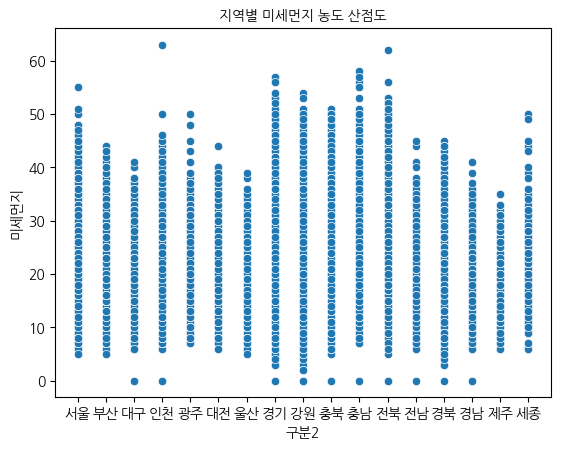

In [116]:
# 데이터 시각화
sns.scatterplot(x = total_df.index, y = total_df['미세먼지'])
plt.title('지역별 미세먼지 농도 산점도', fontsize = 18, fontproperties='NanumGothic')
plt.show()

2. 연도별 미세먼지 월평균이 제일 높은 지역의 월(Month) 개수

In [117]:
# 2015년부터 2021년까지 지역마다 미세먼지 월평균이 제일 높은 월 구하기
max_month_df = pd.DataFrame(index=df_dic.keys())

for year, df in df_dic.items():
    df = df[df['구분1'] == '도시대기']
    grouped = df.groupby('구분2')
    
    for area, group in grouped:
        monthly_means = group.loc[:, '1월':'12월'].mean()
        max_month = monthly_means.idxmax()
        max_month_df.loc[year, area] = max_month

max_month_df

,강원,경기,경남,경북,광주,대구,대전,부산,서울,울산,인천,전남,전북,제주,충남,충북,세종
2015년,2월,2월,2월,12월,3월,1월,3월,2월,2월,2월,12월,2월,10월,3월,12월,10월,NaN
2016년,3월,3월,5월,3월,3월,11월,1월,1월,3월,5월,3월,3월,1월,5월,3월,12월,5월
2017년,3월,3월,3월,3월,3월,1월,3월,3월,3월,3월,3월,3월,3월,3월,3월,1월,3월
2018년,1월,3월,2월,11월,11월,11월,11월,2월,3월,11월,3월,2월,11월,4월,11월,11월,12월
2019년,3월,3월,3월,1월,3월,2월,3월,3월,3월,3월,3월,3월,3월,3월,3월,3월,3월
2020년,2월,1월,2월,12월,1월,1월,1월,2월,1월,2월,1월,1월,1월,2월,1월,1월,1월
2021년,2월,3월,2월,2월,3월,2월,3월,3월,3월,2월,3월,3월,3월,3월,3월,2월,3월


In [85]:
# 지역별 월의 개수 종합
monthly_counts_df = pd.DataFrame(index=df_dic['2015년'].columns[4:])  # 1월부터 12월을 index로 사용하기 위해 데이터 프레임의 컬럼명을 가져옴

for area in max_month_df.columns:
    area_counts = max_month_df[area].value_counts().astype(int)
    monthly_counts_df = pd.concat([monthly_counts_df, area_counts], axis=1)

monthly_counts_df.fillna(0, inplace=True)
monthly_counts_df['합계'] = monthly_counts_df.sum(axis=1)

monthly_counts_df

,강원,경기,경남,경북,광주,대구,대전,부산,서울,울산,인천,전남,전북,제주,충남,충북,세종,합계
1월,1.0,1.0,0.0,1.0,1.0,3.0,2.0,1.0,1.0,0.0,1.0,1.0,2.0,0.0,1.0,2.0,1.0,19.0
2월,3.0,1.0,4.0,1.0,0.0,2.0,0.0,3.0,1.0,3.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,22.0
3월,3.0,5.0,2.0,2.0,5.0,0.0,4.0,3.0,5.0,2.0,5.0,4.0,3.0,4.0,4.0,1.0,3.0,55.0
4월,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5월,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,4.0
6월,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7월,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8월,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9월,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10월,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0


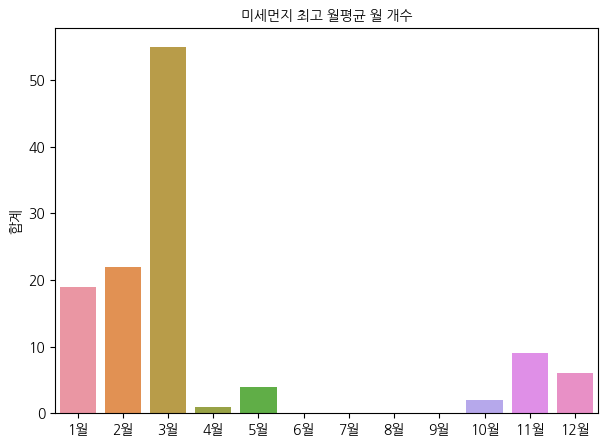

In [86]:
# 그래프 그리기
plt.figure(figsize=(7, 5))
sns.barplot(x = monthly_counts_df.index, y = monthly_counts_df['합계'])
plt.title('미세먼지 최고 월평균 월 개수', fontsize = 18, fontproperties='NanumGothic')
plt.show()

3. 2021년 전국 미세먼지 연평균

In [87]:
# 2021년 각 지역의 연 평균 구하기
grouped = df_dic['2021년'].groupby(['구분1'])

year_df = pd.DataFrame(index=grouped.get_group('도시대기')['구분2'].unique())

for area in year_df.index:
    area_data = grouped.get_group('도시대기')[grouped.get_group('도시대기')['구분2'] == area]
    monthly_sum = area_data.sum()['1월':'12월'].sum()
    data_count = area_data.count()['1월':'12월'].sum()
    average = round(monthly_sum / data_count, 2)
    year_df.loc[area, '미세먼지 합'] = monthly_sum
    year_df.loc[area, '데이터 개수'] = data_count
    year_df.loc[area, '평균'] = average

year_df.sort_values(by='평균', ascending=False, inplace=True); year_df

,미세먼지 합,데이터 개수,평균
충남,8947.0,426.0,21.00
경기,26376.0,1273.0,20.72
인천,5905.0,288.0,20.50
서울,5963.0,300.0,19.88
충북,6620.0,337.0,19.64
전북,7499.0,392.0,19.13
세종,868.0,48.0,18.08
광주,2383.0,132.0,18.05
대구,3643.0,208.0,17.51
경북,8322.0,503.0,16.54


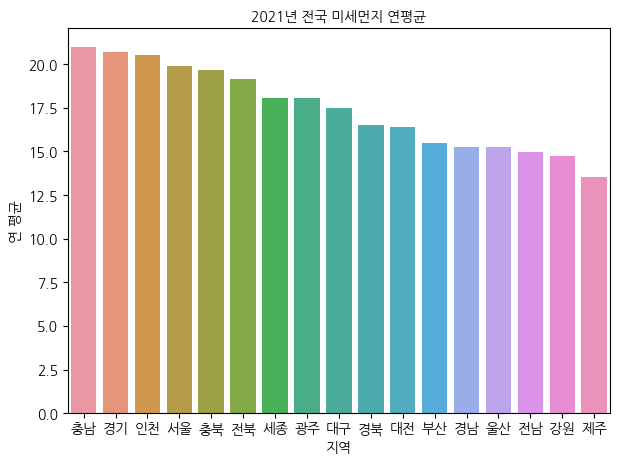

In [88]:
# 그래프 그리기
plt.figure(figsize=(7, 5)) # 사이즈 설정
sns.barplot(x = year_df.index, y = year_df['평균'])
plt.xlabel('지역')
plt.ylabel('연 평균')
plt.title('2021년 전국 미세먼지 연평균', fontsize = 18, fontproperties='NanumGothic')
plt.show()

4. 특정 지역의 미세먼지 연평균 변화량

In [89]:
# 특정 지역(서울)의 미세먼지 연평균 구하기
LOCATION = '서울'
location_df = pd.DataFrame(index = df_dic.keys())

for year in df_dic.keys():
    grouped = df_dic[year].groupby(['구분1', '구분2'])
    location_df.loc[year, '미세먼지 합'] = grouped.get_group(('도시대기', LOCATION)).sum()['1월':'12월'].sum()
    location_df.loc[year, '데이터 개수'] = grouped.get_group(('도시대기', LOCATION)).count()['1월':'12월'].sum()
    location_df.loc[year, '연평균'] = round(location_df.loc[year, '미세먼지 합'] / location_df.loc[year, '데이터 개수'], 2)

location_df.reset_index(inplace = True) # 행 인덱스 초기화
location_df.rename(columns = {'index' : '연도'}, inplace = True); location_df

,연도,미세먼지 합,데이터 개수,연평균
0,2015년,6985.0,300.0,23.28
1,2016년,7857.0,300.0,26.19
2,2017년,7392.0,300.0,24.64
3,2018년,6878.0,300.0,22.93
4,2019년,7399.0,299.0,24.75
5,2020년,6209.0,300.0,20.70
6,2021년,5963.0,300.0,19.88


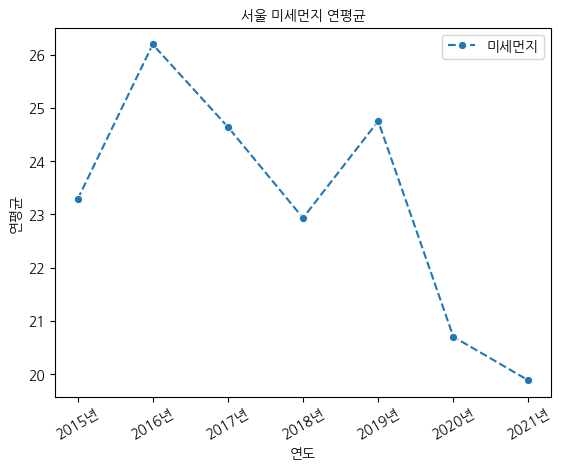

In [90]:
# 그래프 그리기
sns.lineplot(data = location_df, x = '연도' , y = '연평균', marker = 'o', linestyle = '--', label = '미세먼지')
plt.xticks(rotation=30)  # x축 회전
plt.title(LOCATION+' 미세먼지 연평균', fontsize = 18, fontproperties='NanumGothic')
plt.show()

5. 지역의 월별 미세먼지 평균

In [91]:
# 2015년 ~ 2021년 미세먼지 데이터 연결
all_df = pd.DataFrame()
for year in df_dic.keys():
    all_df = pd.concat([all_df, df_dic[year]], ignore_index = True) # axis = 0 (default)

all_df

,구분1,구분2,구분3,구분4,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
0,도시대기,서울,중구,서소문동,21.0,27.0,34.0,26.0,26.0,24.0,18.0,21.0,14.0,23.0,18.0,23.0
1,도시대기,서울,종로구,효제동,24.0,30.0,27.0,20.0,24.0,28.0,27.0,27.0,17.0,24.0,21.0,32.0
2,도시대기,서울,중랑구,면목동,26.0,31.0,31.0,22.0,23.0,20.0,19.0,21.0,15.0,22.0,19.0,26.0
3,도시대기,서울,동대문구,용두동,22.0,26.0,31.0,23.0,22.0,20.0,20.0,23.0,16.0,25.0,22.0,26.0
4,도시대기,서울,은평구,불광동,28.0,33.0,32.0,21.0,20.0,17.0,17.0,21.0,15.0,22.0,19.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2651,도로변대기,경북,포항,우현동,NaN,NaN,NaN,NaN,16.0,18.0,8.0,12.0,16.0,18.0,25.0,20.0
2652,도로변대기,경남,창원,반송로,15.0,17.0,19.0,15.0,16.0,18.0,12.0,10.0,6.0,11.0,14.0,13.0
2653,도로변대기,경남,김해,김해대로,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,16.0,21.0,20.0
2654,도로변대기,경남,시도평균,소계,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,13.0,17.0,17.0


In [92]:
# 월 데이터 평균 종합하기
grouped = all_df.groupby(['구분1'])

monthly_average_df = pd.DataFrame(index = grouped.get_group('도시대기')['구분2'].unique())
month_index = grouped.get_group('도시대기').columns[4:]

for area in monthly_average_df.index:
    monthly_average_df.loc[area, month_index] = grouped.get_group('도시대기')[grouped.get_group('도시대기')['구분2'] == area].sum()['1월':'12월'] / \
                                  grouped.get_group('도시대기')[grouped.get_group('도시대기')['구분2'] == area].count()['1월':'12월']

monthly_average_df = monthly_average_df.transpose() # 행, 열 위치 바꾸기
monthly_average_df

,서울,부산,대구,인천,광주,대전,울산,경기,강원,충북,충남,전북,전남,경북,경남,제주,세종
1월,29.177143,26.082759,28.440000,27.505051,27.240000,26.687500,22.000000,32.306733,27.261905,34.044944,30.765217,31.683168,21.621429,24.979592,21.904110,19.200000,31.500000
2월,29.257143,26.659722,27.441558,27.380000,27.040000,26.580000,23.385542,32.068796,27.795455,32.935484,31.239316,30.439252,22.673611,25.611650,22.924138,21.200000,30.812500
3월,34.005714,25.918919,26.261905,32.301887,29.461538,27.920000,23.927711,35.890443,28.704545,33.373737,33.317460,33.517857,22.844595,23.405172,22.033784,23.866667,32.187500
4월,23.280000,22.135135,20.035294,22.315315,21.788462,18.843137,20.928571,22.532558,20.011236,22.923077,21.208000,23.177966,17.385135,18.256410,18.326531,19.900000,19.125000
5월,23.702857,23.918367,21.494118,22.630631,21.980769,19.803922,23.518072,23.288330,20.034091,22.912621,22.124031,23.772358,18.754967,18.528000,19.755102,19.800000,19.294118
6월,22.074286,22.060811,21.494118,21.450450,22.307692,19.294118,22.880952,21.469663,18.100000,21.548077,21.088235,24.959677,18.421053,18.238462,20.020833,17.482759,19.210526
7월,17.914286,16.785235,15.823529,18.223214,14.057692,12.716981,17.905882,15.893805,13.100000,12.900000,14.468531,14.365079,13.045455,12.992366,15.276596,12.533333,12.842105
8월,16.154286,17.099338,14.297619,15.964286,14.981132,12.169811,15.809524,13.926667,12.300000,12.314815,14.430556,14.530769,14.826923,13.172932,15.496454,13.300000,13.400000
9월,13.971264,14.761589,13.370370,14.398230,14.716981,12.471698,13.569767,12.642544,10.325843,13.118182,12.744828,14.907692,12.512821,12.207407,13.134228,13.133333,11.750000
10월,17.097143,16.703947,16.777778,17.186441,18.886792,16.264151,14.942529,17.912854,14.098901,20.207207,18.331081,19.305344,14.567742,15.507353,14.786667,14.806452,16.600000


In [93]:
# 1월 -> 1월 평균 ... 인덱스명 변경
monthly_average_df.index = [f'{x} 평균' for x in monthly_average_df.index]

avgPM2_5_df = monthly_average_df
avgPM2_5_df

,서울,부산,대구,인천,광주,대전,울산,경기,강원,충북,충남,전북,전남,경북,경남,제주,세종
1월 평균,29.177143,26.082759,28.440000,27.505051,27.240000,26.687500,22.000000,32.306733,27.261905,34.044944,30.765217,31.683168,21.621429,24.979592,21.904110,19.200000,31.500000
2월 평균,29.257143,26.659722,27.441558,27.380000,27.040000,26.580000,23.385542,32.068796,27.795455,32.935484,31.239316,30.439252,22.673611,25.611650,22.924138,21.200000,30.812500
3월 평균,34.005714,25.918919,26.261905,32.301887,29.461538,27.920000,23.927711,35.890443,28.704545,33.373737,33.317460,33.517857,22.844595,23.405172,22.033784,23.866667,32.187500
4월 평균,23.280000,22.135135,20.035294,22.315315,21.788462,18.843137,20.928571,22.532558,20.011236,22.923077,21.208000,23.177966,17.385135,18.256410,18.326531,19.900000,19.125000
5월 평균,23.702857,23.918367,21.494118,22.630631,21.980769,19.803922,23.518072,23.288330,20.034091,22.912621,22.124031,23.772358,18.754967,18.528000,19.755102,19.800000,19.294118
6월 평균,22.074286,22.060811,21.494118,21.450450,22.307692,19.294118,22.880952,21.469663,18.100000,21.548077,21.088235,24.959677,18.421053,18.238462,20.020833,17.482759,19.210526
7월 평균,17.914286,16.785235,15.823529,18.223214,14.057692,12.716981,17.905882,15.893805,13.100000,12.900000,14.468531,14.365079,13.045455,12.992366,15.276596,12.533333,12.842105
8월 평균,16.154286,17.099338,14.297619,15.964286,14.981132,12.169811,15.809524,13.926667,12.300000,12.314815,14.430556,14.530769,14.826923,13.172932,15.496454,13.300000,13.400000
9월 평균,13.971264,14.761589,13.370370,14.398230,14.716981,12.471698,13.569767,12.642544,10.325843,13.118182,12.744828,14.907692,12.512821,12.207407,13.134228,13.133333,11.750000
10월 평균,17.097143,16.703947,16.777778,17.186441,18.886792,16.264151,14.942529,17.912854,14.098901,20.207207,18.331081,19.305344,14.567742,15.507353,14.786667,14.806452,16.600000


/var/folders/hz/qr0lqhjs76d3t1bt1dqxsq0w0000gn/T/ipykernel_9157/1515007303.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=45)
/var/folders/hz/qr0lqhjs76d3t1bt1dqxsq0w0000gn/T/ipykernel_9157/1515007303.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=45)
/var/folders/hz/qr0lqhjs76d3t1bt1dqxsq0w0000gn/T/ipykernel_9157/1515007303.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=45)
/var/folders/hz/qr0lqhjs76d3t1bt1dqxsq0w0000gn/T/ipykernel_9157/1515007303.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=45)
/var/folders/hz/qr0lqhjs76d3t1bt1dqxsq0w0000gn/T/ipykernel_9157/1515007303.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=45)
/var/folde

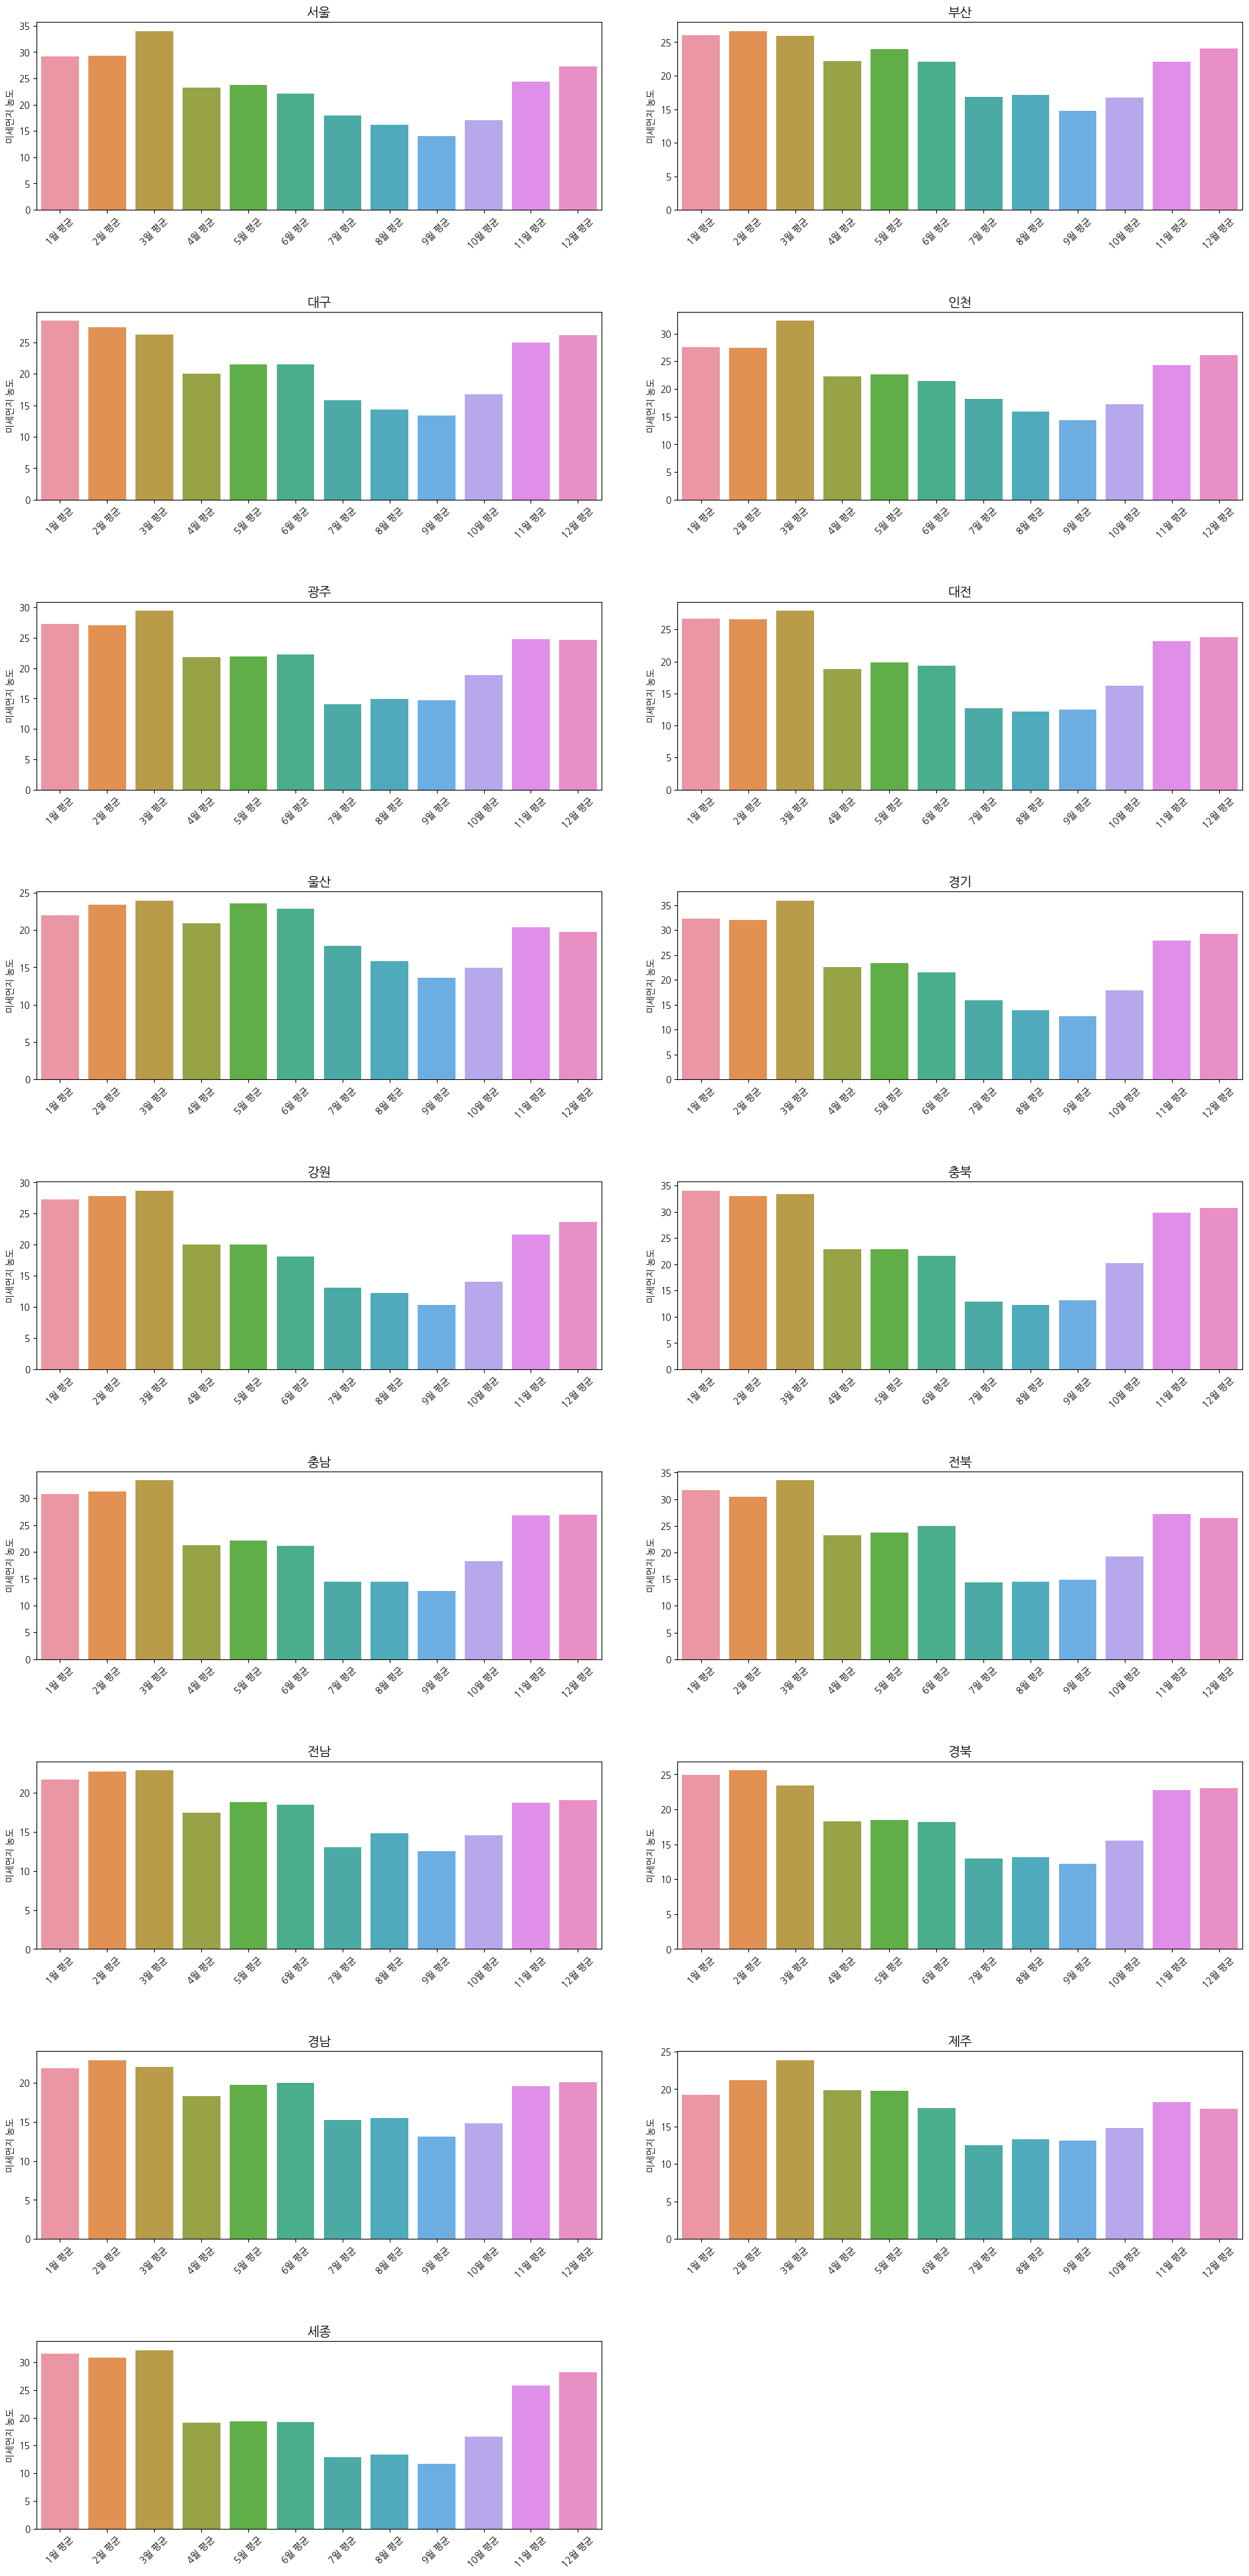

In [94]:
fig, axes = plt.subplots(9, 2, figsize=(20, 40))
axes = axes.flatten()

labels = monthly_average_df.index

for i, area in enumerate(monthly_average_df.columns):
    ax = axes[i]
    ax.set_xticklabels(labels, rotation=45)
    sns.barplot(x=labels, y=monthly_average_df[area], ax=ax)
    ax.set_ylabel('미세먼지 농도')
    ax.set_title(area, fontsize=14)

# 사용하지 않는 그래프 숨김
for j in range(len(monthly_average_df.columns), len(axes)):
    fig.delaxes(axes[j])

fig.tight_layout(pad=5)
plt.show()

## 공공데이터 날씨 API
- datasource: [기상청_지상(종관, ASOS) 일자료 조회서비스](https://www.data.go.kr/data/15059093/openapi.do)
- 날씨 측정 지점 관련 csv파일(stnIdsCode.csv)은 위 링크의 참고 문서 11p ~ 13p를 참고하여 생성함

In [95]:
# 날씨 측정 지점코드, 지점명, 관리관서 정보가 담긴 데이터 프레임
# 경기, 강원, 충북, 충남, 전북, 전남, 경북, 경남 (도)는 더 세분화 되어있음 | 광역 자치 단체(시 도), 기초 자치 단체(시 군 구)

weather_df = pd.DataFrame()  # 날씨 데이터 프레임
stnIds_df = pd.read_csv('./dataset/기상청_지상(종관, ASOS) 일자료 조회서비스/stnIdsCode.csv', encoding='cp949')  # 날씨 측정 지점코드, 지점명, 관리관서가 담긴 csv파일
stnIds_df

,지점,지점명,관리관서
0,90,속초,강원지방기상청
1,93,북춘천,춘천기상대
2,95,철원,강원지방기상청
3,98,동두천,수도권기상청
4,99,파주,수도권기상청
...,...,...,...
90,285,합천,울산기상대
91,288,밀양,울산기상대
92,289,산청,창원기상대
93,294,거제,부산지방기상청


1. API 호출 함수
- stnNm : 지점명(종관기상관측 지점명)
- tm : 일시
- sumRn : 일강수량(mm)
- avgWs : 평균 풍속(m/s)
- maxWd : 최다 풍향(16방위)

In [96]:
# 날씨 API 호출 함수
def callWeatherAPI(area_df):
    rtn_df = pd.DataFrame() # 날씨 API 호출시 반환될 데이터 프레임
  
    for area in area_df['area']: 
        AUTH_KEY = 'j6%2FgmhhoGVVpoOeQuphJFCikF49L8MJC6cf%2FslCvKVP77QDhwiX85QX4p3%2BYO5T6BTOe3i87ycZN%2BC1bVOlV2g%3D%3D'
        if (len(stnIds_df.loc[stnIds_df['지점명'] == area, '지점'])):
            for pageNo in range(1, 10):
                url = 'http://apis.data.go.kr/1360000/AsosDalyInfoService/getWthrDataList'
                url += '?serviceKey=' + AUTH_KEY
                url += '&pageNo=' + str(pageNo)
                url += '&numOfRows=900'
                url += '&dataType=JSON'
                url += '&dataCd=ASOS'
                url += '&dateCd=DAY'
                url += '&startDt=20150101'
                url += '&endDt=20211231'
                url += '&stnIds=' + str(int(stnIds_df.loc[stnIds_df['지점명'] == area, '지점']))
                response = requests.get(url)
                jsonData = json.loads(response.text)
        
                print(f'지점명 : {area}({pageNo})')
                print(f'resultMsg : {jsonData["response"]["header"]["resultMsg"]}')
                if(jsonData['response']['header']['resultMsg'] == 'NO_DATA'): 
                    break # 'NO_DATA' : 더이상 데이터가 없는 경우, 'NORMAL_SERVICE' : 정상작동

                json_df = pd.json_normalize(jsonData['response']['body']['items']['item'])
                rtn_df = pd.concat([rtn_df, json_df[['stnNm', 'tm', 'sumRn', 'avgWs', 'maxWd']]], join = 'outer', ignore_index = True)

    return rtn_df

2. API 함수 호출 시 쓰일 인수(지역 데이터 프레임) 생성
- 미세먼지 데이터 프레임(df_dic)의 지역(컬럼명 : 구분2) 고유값이 담긴 데이터 프레임 생성

In [97]:
area_df = pd.DataFrame()
area_df['area'] = np.nan

for year in df_dic.keys():
    area_tmp_df = pd.DataFrame()
    area_tmp_df['area'] = df_dic[year].loc[df_dic[year]['구분1'] == '도시대기', '구분2'].unique()
    area_df = pd.merge(area_df, area_tmp_df, how = 'outer', on = 'area')

area_df

,area
0,서울
1,부산
2,대구
3,인천
4,광주
5,대전
6,울산
7,경기
8,강원
9,충북


3. API 함수 호출
- 각 지역의 20150101~20211231 날씨 데이터를 불러옴
- 데이터 응답 형태
    - resultMsg : NO_DATA -> 데이터 없음
    - resultMsg : NORMAL_SERVICE -> 정상 작동
    - resultMsg : SERVICETIME_OUT -> 서비스 연결 실패
    - resultMsg : APPLICATION_ERROR -> 어플리케이션 에러
    - 이 외 참고문서 15p 참고

In [138]:
# 위에서 생성한 area_df를 인자로 사용
weather_df = callWeatherAPI(area_df)

지점명 : 서울(1)
resultMsg : NORMAL_SERVICE
지점명 : 서울(2)
resultMsg : NORMAL_SERVICE
지점명 : 서울(3)
resultMsg : NORMAL_SERVICE
지점명 : 서울(4)
resultMsg : NO_DATA
지점명 : 부산(1)
resultMsg : NORMAL_SERVICE
지점명 : 부산(2)
resultMsg : NORMAL_SERVICE
지점명 : 부산(3)
resultMsg : NORMAL_SERVICE
지점명 : 부산(4)
resultMsg : NO_DATA
지점명 : 대구(1)
resultMsg : NORMAL_SERVICE
지점명 : 대구(2)
resultMsg : NORMAL_SERVICE
지점명 : 대구(3)
resultMsg : NORMAL_SERVICE
지점명 : 대구(4)
resultMsg : NO_DATA
지점명 : 인천(1)
resultMsg : NORMAL_SERVICE
지점명 : 인천(2)
resultMsg : NORMAL_SERVICE
지점명 : 인천(3)
resultMsg : NORMAL_SERVICE
지점명 : 인천(4)
resultMsg : NO_DATA
지점명 : 광주(1)
resultMsg : NORMAL_SERVICE
지점명 : 광주(2)
resultMsg : NORMAL_SERVICE
지점명 : 광주(3)
resultMsg : NORMAL_SERVICE
지점명 : 광주(4)
resultMsg : NO_DATA
지점명 : 대전(1)
resultMsg : NORMAL_SERVICE
지점명 : 대전(2)
resultMsg : NORMAL_SERVICE
지점명 : 대전(3)
resultMsg : NORMAL_SERVICE
지점명 : 대전(4)
resultMsg : NO_DATA
지점명 : 울산(1)
resultMsg : NORMAL_SERVICE
지점명 : 울산(2)
resultMsg : NORMAL_SERVICE
지점명 : 울산(3)
resultMsg : NORM

3. 불러온 데이터셋 확인
- stnNm : 지점명(종관기상관측 지점명)
- tm : 시간
- sumRn : 강수량
- avgWs : 평균풍속
- maxWd : 최대 풍향

In [140]:
# 불러온 데이터 프레임의 요약 정보
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21402 entries, 0 to 21401
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   stnNm   21402 non-null  object
 1   tm      21402 non-null  object
 2   sumRn   21402 non-null  object
 3   avgWs   21402 non-null  object
 4   maxWd   21402 non-null  object
dtypes: object(5)
memory usage: 836.1+ KB


In [141]:
# 날씨 데이터 프레임 컬럼명 변경
weather_df.rename(columns = {'stnNm' : '지점명', 'tm' : '일시', 'sumRn' : '일강수량(mm)', \
                             'avgWs' : '평균풍속(m/s)', 'maxWd' : '최다풍향(16방위)'}, inplace = True)
weather_df 

,지점명,일시,일강수량(mm),평균풍속(m/s),최다풍향(16방위)
0,서울,2015-01-01,,4.6,290
1,서울,2015-01-02,,3.2,270
2,서울,2015-01-03,,1.9,230
3,서울,2015-01-04,0.0,2.0,50
4,서울,2015-01-05,0.4,2.4,70
...,...,...,...,...,...
21397,세종,2021-12-27,0.2,0.9,290
21398,세종,2021-12-28,,0.4,20
21399,세종,2021-12-29,0.0,1.2,290
21400,세종,2021-12-30,0.9,1.8,290


4. 년, 월, 일 컬럼 생성

In [142]:
def addYear(date):
    # year = date[:4]
    year = date.split('-')[0]
    return year

def addMonth(date):
    # month = date[5:7]
    month = date.split('-')[1]
    return month

def addDay(date):
    day = date.split('-')[2]
    return day

In [143]:
# 일시 -> 년, 월, 일 열로 분리

weather_df['년'] = weather_df.apply(lambda x: addYear(x['일시']), axis = 1)
weather_df['월'] = weather_df.apply(lambda x: addMonth(x['일시']), axis = 1)
weather_df['일'] = weather_df.apply(lambda x: addDay(x['일시']), axis = 1)
weather_df['월'] = weather_df['월'].astype(int) # 01월~09월 경우 앞에 0 없애기 위한 int형변환
weather_df['일'] = weather_df['일'].astype(int) # 01일~09일 경우 앞에 0 없애기 위한 int형변환 

weather_df.drop(['일시'], axis = 1, inplace = True); weather_df

,지점명,일강수량(mm),평균풍속(m/s),최다풍향(16방위),년,월,일
0,서울,,4.6,290,2015,1,1
1,서울,,3.2,270,2015,1,2
2,서울,,1.9,230,2015,1,3
3,서울,0.0,2.0,50,2015,1,4
4,서울,0.4,2.4,70,2015,1,5
...,...,...,...,...,...,...,...
21397,세종,0.2,0.9,290,2021,12,27
21398,세종,,0.4,20,2021,12,28
21399,세종,0.0,1.2,290,2021,12,29
21400,세종,0.9,1.8,290,2021,12,30


5. csv 파일로 저장

In [144]:
# 날씨 데이터 프레임 csv파일로 저장
weather_df.to_csv('./dataset/기상청_지상(종관, ASOS) 일자료 조회서비스/weather.csv')

### 일별 날씨 데이터 가공

1. dataset 불러오기

In [98]:
# 날씨 csv 파일 불러오기
weather_df = pd.read_csv('./dataset/기상청_지상(종관, ASOS) 일자료 조회서비스/weather.csv', index_col = 0); weather_df

,지점명,일강수량(mm),평균풍속(m/s),최다풍향(16방위),년,월,일
0,서울,NaN,4.6,290.0,2015,1,1
1,서울,NaN,3.2,270.0,2015,1,2
2,서울,NaN,1.9,230.0,2015,1,3
3,서울,0.0,2.0,50.0,2015,1,4
4,서울,0.4,2.4,70.0,2015,1,5
...,...,...,...,...,...,...,...
21397,세종,0.2,0.9,290.0,2021,12,27
21398,세종,NaN,0.4,20.0,2021,12,28
21399,세종,0.0,1.2,290.0,2021,12,29
21400,세종,0.9,1.8,290.0,2021,12,30


In [146]:
# 일별 날씨 데이터 프레임의 요약 정보
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21402 entries, 0 to 21401
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   지점명         21402 non-null  object 
 1   일강수량(mm)    8233 non-null   float64
 2   평균풍속(m/s)   21386 non-null  float64
 3   최다풍향(16방위)  21333 non-null  float64
 4   년           21402 non-null  int64  
 5   월           21402 non-null  int64  
 6   일           21402 non-null  int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 1.3+ MB


In [5]:
# 불러온 데이터 지점명 확인(고유값)
weather_df['지점명'].unique()

# 경기, 강원, 충북, 충남, 전북, 전남, 경북, 경남 (도)는 더 세분화 되어있음 | 광역 자치 단체(시 도), 기초 자치 단체(시 군 구)

array(['서울', '부산', '대구', '인천', '광주', '대전', '울산', '제주', '세종'], dtype=object)

2. dataset 가공

In [13]:
# 일강수량 결측치 채우기
weather_df['일강수량(mm)'].fillna(0, inplace = True)

# 풍속과 풍향 결측치 제거
weather_df.dropna(subset = ['평균풍속(m/s)', '최다풍향(16방위)'], inplace = True)

In [14]:
# 년, 월, 일 열의 타입을 문자열 타입으로 변경
weather_df['년'] = weather_df['년'].astype(str)
weather_df['월'] = weather_df['월'].astype(str)
weather_df['일'] = weather_df['일'].astype(str)

# 최다풍향(16방위) 열의 타입을 int형으로 변경
weather_df['최다풍향(16방위)'] = weather_df['최다풍향(16방위)'].astype(int)

In [15]:
# 데이터셋 전처리 후 확인하기
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21325 entries, 0 to 21401
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   지점명         21325 non-null  object 
 1   일강수량(mm)    21325 non-null  float64
 2   평균풍속(m/s)   21325 non-null  float64
 3   최다풍향(16방위)  21325 non-null  int64  
 4   년           21325 non-null  object 
 5   월           21325 non-null  object 
 6   일           21325 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 1.3+ MB


3. 데이터셋 부족한 지점 삭제하기

In [16]:
# 각 지점별 년, 월 데이터 고유값 확인
grouped = weather_df.groupby(['지점명', '년'])
for key, value in grouped:
    print(f'지점명 : {key[0]}({key[1]}년도)')
    print(value['월'].unique())

지점명 : 광주(2015년도)
['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12']
지점명 : 광주(2016년도)
['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12']
지점명 : 광주(2017년도)
['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12']
지점명 : 광주(2018년도)
['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12']
지점명 : 광주(2019년도)
['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12']
지점명 : 광주(2020년도)
['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12']
지점명 : 광주(2021년도)
['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12']
지점명 : 대구(2015년도)
['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12']
지점명 : 대구(2016년도)
['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12']
지점명 : 대구(2017년도)
['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12']
지점명 : 대구(2018년도)
['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12']
지점명 : 대구(2019년도)
['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12']
지점명 : 대구(2020년도)
['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12']
지점명 : 대구(2021년도)
['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12']
지점명 : 대전(2015년도)
['1

In [17]:
# 세종시는 2019년와 2020년 날씨 데이터만 가져와진 것을 확인할 수 있음
# 세종시 날씨 데이터 제거
weather_df.drop(weather_df[weather_df['지점명'] == '세종'].index, inplace = True)

weather_df['지점명'].unique() # 제거 확인

array(['서울', '부산', '대구', '인천', '광주', '대전', '울산', '제주'], dtype=object)

4. 일별 날씨 데이터셋 통계정보 확인하기

In [18]:
# 날씨 데이터 프레임의 일강수량, 평균풍속, 최다풍향 통계정보
weather_df[['일강수량(mm)', '평균풍속(m/s)', '최다풍향(16방위)']].describe()

,일강수량(mm),평균풍속(m/s),최다풍향(16방위)
count,20380.000000,20380.000000,20380.000000
mean,3.503047,2.349303,197.275761
std,13.051015,1.154695,111.590474
min,0.000000,0.200000,20.000000
25%,0.000000,1.500000,90.000000
50%,0.000000,2.100000,230.000000
75%,0.300000,2.900000,290.000000
max,310.000000,11.600000,360.000000


### 월별 날씨 데이터로 가공

1. dataset 생성

In [19]:
# 경고 무시
warnings.filterwarnings("ignore", category=FutureWarning)

# 날씨 데이터 지점별 월평균 데이터 및 월 합 데이터로 가공
month_df = pd.DataFrame(columns = ['지점명', '년', '월', '월합강수량(mm)', '평균풍속(m/s)', '최다풍향(16방위)'])

for area in weather_df['지점명'].unique():
    for year in weather_df['년'].unique():
        for month in weather_df['월'].unique():
            df = weather_df[(weather_df['지점명'] == area) & (weather_df['년'] == year) & (weather_df['월'] == month)]
            dic = {'지점명':area, 
                 '년':year, 
                 '월':month, 
                 '월합강수량(mm)':round(df['일강수량(mm)'].sum(), 2), 
                 '평균풍속(m/s)':round(df['평균풍속(m/s)'].mean(), 2), 
                 '최다풍향(16방위)':df['최다풍향(16방위)'].value_counts().index[0]}
            month_df = month_df.append(dic, ignore_index = True)
            
month_df['최다풍향(16방위)'] = month_df['최다풍향(16방위)'].astype(int); month_df

,지점명,년,월,월합강수량(mm),평균풍속(m/s),최다풍향(16방위)
0,서울,2015,1,11.3,2.65,270
1,서울,2015,2,22.7,2.87,270
2,서울,2015,3,9.6,3.08,270
3,서울,2015,4,80.5,3.12,70
4,서울,2015,5,28.9,2.95,270
...,...,...,...,...,...,...
667,제주,2021,8,227.8,2.55,110
668,제주,2021,9,493.1,3.44,90
669,제주,2021,10,32.1,2.89,180
670,제주,2021,11,63.8,3.73,180


2. 일별 날씨 데이터 프레임을 월별 날씨 데이터 프레임으로 변경

In [20]:
weather_df = month_df

In [21]:
# 월별 날씨 데이터 프레임의 요약 정보
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   지점명         672 non-null    object 
 1   년           672 non-null    object 
 2   월           672 non-null    object 
 3   월합강수량(mm)   672 non-null    float64
 4   평균풍속(m/s)   672 non-null    float64
 5   최다풍향(16방위)  672 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 31.6+ KB


In [22]:
# 날씨 데이터 프레임의 월합강수량, 평균풍속, 최다풍향 통계정보
weather_df[['월합강수량(mm)', '평균풍속(m/s)', '최다풍향(16방위)']].describe()

,월합강수량(mm),평균풍속(m/s),최다풍향(16방위)
count,672.000000,672.00000,672.000000
mean,106.238244,2.35128,197.604167
std,109.253216,0.71038,116.678081
min,0.000000,0.92000,20.000000
25%,33.175000,1.75000,50.000000
50%,73.050000,2.31000,230.000000
75%,144.375000,2.91000,320.000000
max,796.800000,4.28000,360.000000


### 2021년 풍향 데이터 시각화

1. 16방위 정보를 담는 리스트 선언
- 16방위 -> 해당 방위에서 불어오는 바람
    - 예) 270이면 서쪽에서 불어오는 바람 -> 서풍
- 남동풍 : 남동쪽에서 불어오는 바람
- 예) 남동쪽은 ↘, 남동풍은 ↖
![16방위 변수들](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fb69cnT%2FbtrDvM5w7Ud%2FkisZfsWWWmfr4631P25Qx0%2Fimg.png)

In [23]:
# 16방위 변수들
eng_16 = ['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE', 'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW']
deg_16 = [0, 20, 50, 70, 90, 110, 140, 160, 180, 200, 230, 250, 270, 290, 320, 340]

2. 2021년 최다풍향 시각화

In [33]:
# 2021년 최다풍향 데이터 가공
sr_2021 = weather_df.loc[weather_df['년'] == '2021', '최다풍향(16방위)'].value_counts() # 고유값 개수 시리즈 저장
sr_2021.rename(index = {360 : 0}, inplace = True) # 정렬을 위해 360도(북, N)를 0도로 변경
sr_2021.sort_index(inplace = True) # eng_16에 맞게 정렬
sr_2021 = pd.DataFrame(sr_2021, index = deg_16, columns = ['최다풍향(16방위)'])
sr_2021['최다풍향(16방위)'] = sr_2021['최다풍향(16방위)'].fillna(0)  # NaN일 경우 0으로 채움
sr_2021

,최다풍향(16방위)
0,0.0
20,12.0
50,24.0
70,2.0
90,4.0
110,4.0
140,6.0
160,1.0
180,4.0
200,1.0


3. 시각화
- 2021년 최다풍향 빈도수

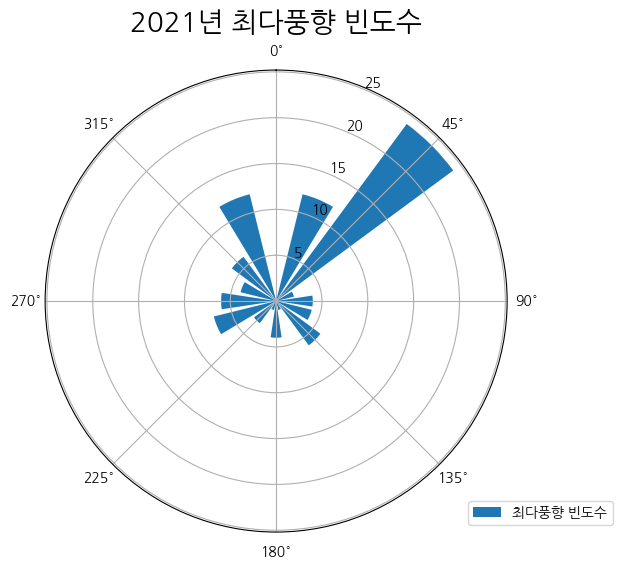

In [34]:
# 그래프 그리기
theta = np.linspace(start = 0, stop = 2*np.pi, num = len(eng_16), endpoint = False)  # x 간격
 
plt.figure(figsize= (6, 6))
ax = plt.subplot(projection='polar')
ax.set_theta_zero_location("N") # 세타의 0도 시작은 "N"인 북으로 설정
ax.set_theta_direction(-1) # 세타 방향을 반대로(반시계 -> 시계)

plt.bar(x = theta, height = sr_2021['최다풍향(16방위)'], width = 0.3, label = '최다풍향 빈도수')

plt.legend(loc = 'lower left', bbox_to_anchor=(0.9, 0.0))
plt.title('2021년 최다풍향 빈도수',size = 20, pad = 10)
plt.show()

4. 2021년 계절별 최다풍향 시각화

In [62]:
# 2021년 계절별 최다풍향 데이터 가공
seasons = {
    '봄': ['3', '4', '5'],
    '여름': ['6', '7', '8'],
    '가을': ['9', '10', '11'],
    '겨울': ['12', '1', '2']
}

wind_season_2021 = pd.DataFrame(index = deg_16)
df = weather_df.loc[weather_df['년'] == '2021', ['월', '최다풍향(16방위)']]

for season, months in seasons.items():
    wind_season_2021[season] = df.loc[df['월'].isin(months), '최다풍향(16방위)'].value_counts()

wind_season_2021.rename(index={360: 0}, inplace=True)
wind_season_2021.sort_index(inplace=True)

wind_season_2021 = my_df.fillna(0).astype(int); wind_season_2021

,봄,여름,가을,겨울
0,0,0,0,0
20,2,2,3,5
50,6,9,6,3
70,1,0,1,0
90,1,1,2,0
110,2,1,1,0
140,1,4,1,0
160,0,1,0,0
180,0,1,3,0
200,1,0,0,0


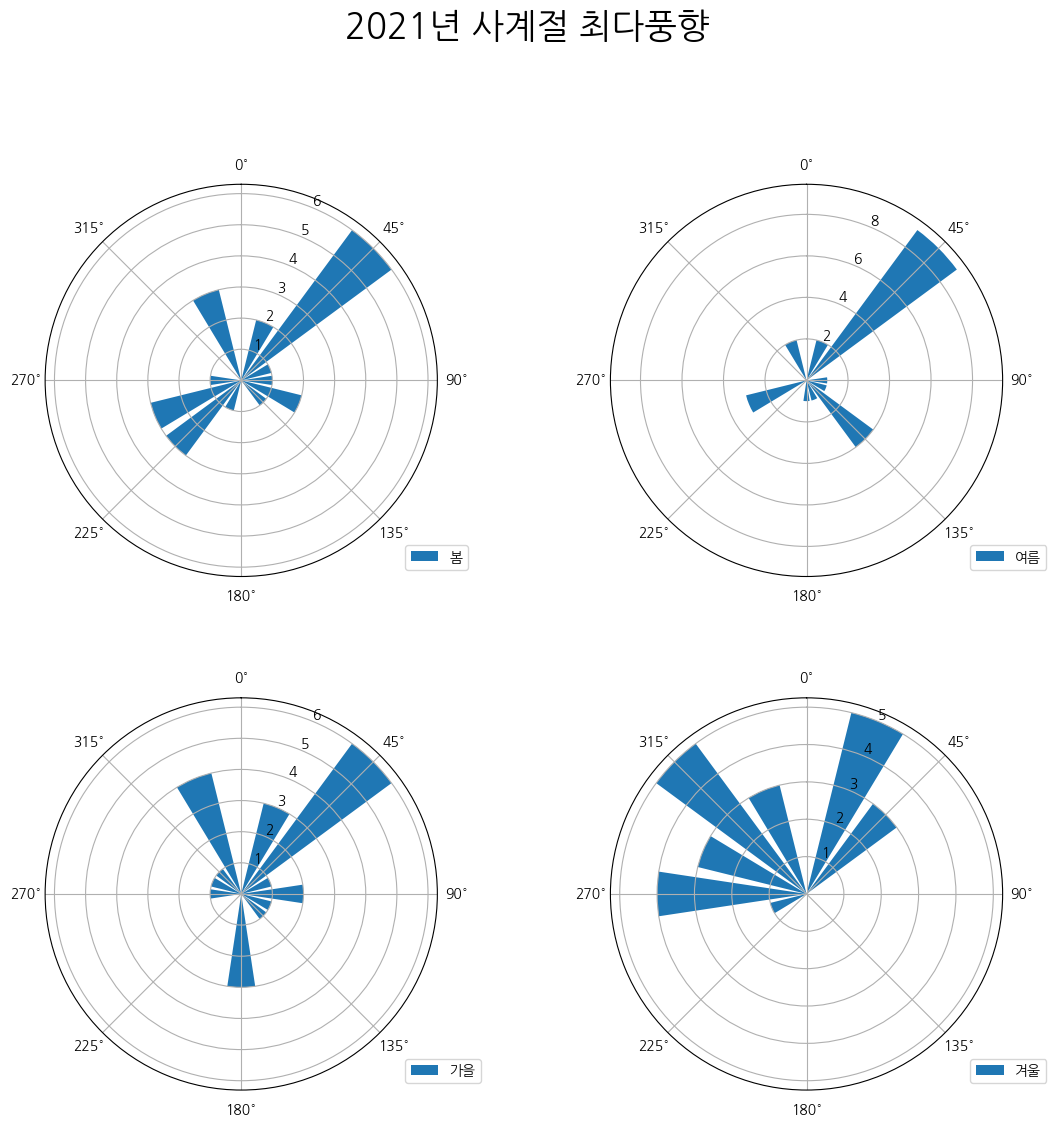

In [61]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12), subplot_kw=dict(polar=True))

labels = np.linspace(start=0, stop=2 * np.pi, num=len(deg_16) + 1)
theta = np.linspace(0, 2 * np.pi, len(deg_16), endpoint=False)

for (season, ax) in zip(['봄', '여름', '가을', '겨울'], axes.flatten()):
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    ax.bar(theta, wind_season_2021[season], width=0.3, label=season)
    ax.legend(loc='lower left', bbox_to_anchor=(0.9, 0.0))

fig.suptitle("2021년 사계절 최다풍향", fontsize=25)
fig.tight_layout(pad=5)

plt.show()

### 미세먼지 데이터와 날씨 데이터 함께 분석

1. 미세먼지 데이터와 날씨 데이터 이용해서 추가하기 

In [106]:
for year in df_dic.keys():
    area_df = df_dic[year][df_dic[year]['구분1'] == '도시대기']
    for month in area_df.columns[4:]:
        for area in area_df['구분2'].unique():    
            cnt = area_df.loc[area_df['구분2'] == area, month].count()
            if cnt != 0:
                numerator = area_df.loc[area_df['구분2'] == area, month].sum()
                average = numerator / cnt
                weather_df.loc[(weather_df['년'] == year[:-1]) &
                               (weather_df['월'] == month[:-1]) &
                               (weather_df['지점명'] == area), '미세먼지'] = average
            else:
                weather_df.loc[(weather_df['년'] == year[:-1]) &
                               (weather_df['월'] == month[:-1]) &
                               (weather_df['지점명'] == area), '미세먼지'] = 0
weather_df

,지점명,일강수량(mm),평균풍속(m/s),최다풍향(16방위),년,월,일,미세먼지
0,서울,NaN,4.6,290.0,2015,1,1,NaN
1,서울,NaN,3.2,270.0,2015,1,2,NaN
2,서울,NaN,1.9,230.0,2015,1,3,NaN
3,서울,0.0,2.0,50.0,2015,1,4,NaN
4,서울,0.4,2.4,70.0,2015,1,5,NaN
...,...,...,...,...,...,...,...,...
21397,세종,0.2,0.9,290.0,2021,12,27,NaN
21398,세종,NaN,0.4,20.0,2021,12,28,NaN
21399,세종,0.0,1.2,290.0,2021,12,29,NaN
21400,세종,0.9,1.8,290.0,2021,12,30,NaN


In [170]:
# 날씨 데이터 프레임 요약 정보
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   지점명         672 non-null    object 
 1   년           672 non-null    object 
 2   월           672 non-null    object 
 3   월합강수량(mm)   672 non-null    float64
 4   평균풍속(m/s)   672 non-null    float64
 5   최다풍향(16방위)  672 non-null    int64  
 6   미세먼지        672 non-null    float64
dtypes: float64(3), int64(1), object(3)
memory usage: 36.9+ KB


In [107]:
# 날씨 데이터 확인
weather_df

,지점명,일강수량(mm),평균풍속(m/s),최다풍향(16방위),년,월,일,미세먼지
0,서울,NaN,4.6,290.0,2015,1,1,NaN
1,서울,NaN,3.2,270.0,2015,1,2,NaN
2,서울,NaN,1.9,230.0,2015,1,3,NaN
3,서울,0.0,2.0,50.0,2015,1,4,NaN
4,서울,0.4,2.4,70.0,2015,1,5,NaN
...,...,...,...,...,...,...,...,...
21397,세종,0.2,0.9,290.0,2021,12,27,NaN
21398,세종,NaN,0.4,20.0,2021,12,28,NaN
21399,세종,0.0,1.2,290.0,2021,12,29,NaN
21400,세종,0.9,1.8,290.0,2021,12,30,NaN


## 데이터 분석

### 상관 관계 분석

- 상관계수
    - 0 ~ 1 정상관(Positive Correlation)
    - 1 ~ 0 부상관(Negative Correlation)
- 결과 분석
    - 월합강수량은 높을 수록 미세먼지가 줄어드는 관계 => **부상관**
    - 평균풍속도 높을 수록 미세먼지와 관련이 높다는 걸 확인할 수 있음 => **정상관**
    - 최다풍향은 360(북) - 90(동) - 180(남) - 270(서) 이므로 양수로 나온 결과로 서쪽에서 바람이 불때(남, 남서, 북서, 북)가 동쪽(북, 북동, 남동, 남)에서보다 상관이 더 높음 => **정상관**
- **즉 중국에서 불어오는 미세먼지의 영향이 있다고 볼 수 있음**

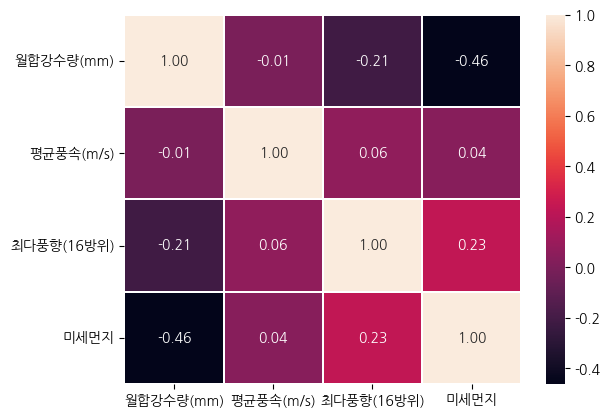

In [63]:
# 미세먼지 데이터와 날씨 데이터 히트맵
sns.heatmap(weather_df[['월합강수량(mm)', '평균풍속(m/s)', '최다풍향(16방위)', '미세먼지']].corr(),
            linewidths = 0.1, annot = True, fmt = '.2f')
plt.show()

## 따라서 미세먼지는 풍향과 관련이 있음

### 풍향별 미세먼지 농도
- 북서풍이 불 때 미세먼지 농도가 상대적으로 높은 것을 알 수 있음

In [105]:
weather_df

,지점명,일강수량(mm),평균풍속(m/s),최다풍향(16방위),년,월,일
0,서울,NaN,4.6,290.0,2015,1,1
1,서울,NaN,3.2,270.0,2015,1,2
2,서울,NaN,1.9,230.0,2015,1,3
3,서울,0.0,2.0,50.0,2015,1,4
4,서울,0.4,2.4,70.0,2015,1,5
...,...,...,...,...,...,...,...
21397,세종,0.2,0.9,290.0,2021,12,27
21398,세종,NaN,0.4,20.0,2021,12,28
21399,세종,0.0,1.2,290.0,2021,12,29
21400,세종,0.9,1.8,290.0,2021,12,30


In [102]:
grouped = weather_df.groupby('최다풍향(16방위)')

dust_wind_df = pd.DataFrame(index = deg_16)

for deg in deg_16:
    if deg == 0: 
        dust_wind_df.loc[deg, '미세먼지'] = grouped.get_group(360)['미세먼지'].mean() # 0도는 360도와 같다(N : 북)
    else:
        dust_wind_df.loc[deg, '미세먼지'] = grouped.get_group(deg)['미세먼지'].mean()

dust_wind_df  

KeyError: '미세먼지'

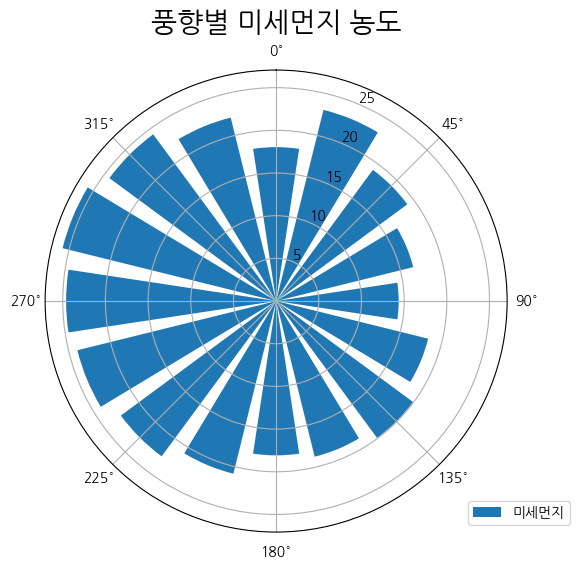

In [182]:
theta = np.linspace(start = 0, stop = 2*np.pi, num = len(eng_16), endpoint = False)

plt.figure(figsize= (6, 6))
ax = plt.subplot(projection='polar')
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)

bar = plt.bar(x = theta, height = dust_wind_df['미세먼지'], width = 0.3, label = '미세먼지')

plt.legend(loc = 'lower left', bbox_to_anchor=(0.9, 0.0))
plt.title('풍향별 미세먼지 농도',size = 20, pad = 10)

plt.show()